In [1]:
import os
import sys
from pathlib import Path
repo_root = Path.cwd().parent
sys.path.append(str(repo_root))

In [2]:
from src.fluence_utils import estimate_so2_from_dot, query_bkg_mua_for_pa, fit_bkg_mus_for_pa, compute_phi_homogeneous, compute_phi_heterogeneous
lambda_list_dot = [730   , 785   , 808   , 830]
mua_list_dot    = [0.032 , 0.038 , 0.037 , 0.041]
mus_list_dot    = [7.860 , 7.489 , 7.155 , 7.830]
decomp_dot      = estimate_so2_from_dot(lambda_list_dot , mua_list_dot , verbose=True)
lambda_list_pat = [750   , 780   , 800   , 830]
bkg_mua_pat = query_bkg_mua_for_pa(lambda_list_pat , decomp_dot['c_oxy'] , decomp_dot['c_deoxy'])
print("Background mua at PAT wavelengths are " , bkg_mua_pat['Background mua'] , " cm\u207B\u00B9")
bkg_mus_pat = fit_bkg_mus_for_pa(lambda_list_dot, mus_list_dot, lambda_list_pat)
print("Background mus at PAT wavelengths are " , bkg_mus_pat['Background mus'] , " cm\u207B\u00B9")

Estimated hemoglobin concentrations from DOT
[HbO2] = 5.22379 mmol/L
[Hb]   = 3.48574 mmol/L
sO2    = 59.98%
Background mua at PAT wavelengths are  [0.04072679 0.03994147 0.03705028 0.04018856]  cm⁻¹
Background mus at PAT wavelengths are  [7.6842432  7.60231057 7.54988587 7.4743008 ]  cm⁻¹


Building sparse matrix ...
Solving diffusion equation on grid 50x10x40 (N=20000)
dx,dy,dz = 0.1, 0.1, 0.1 cm; D=4.3150e-02 cm; h_robin=1
Done. max(Phi) = 1.7898e+01 1/cm^3, mean(Phi) = 1.2516e-02 1/cm^3


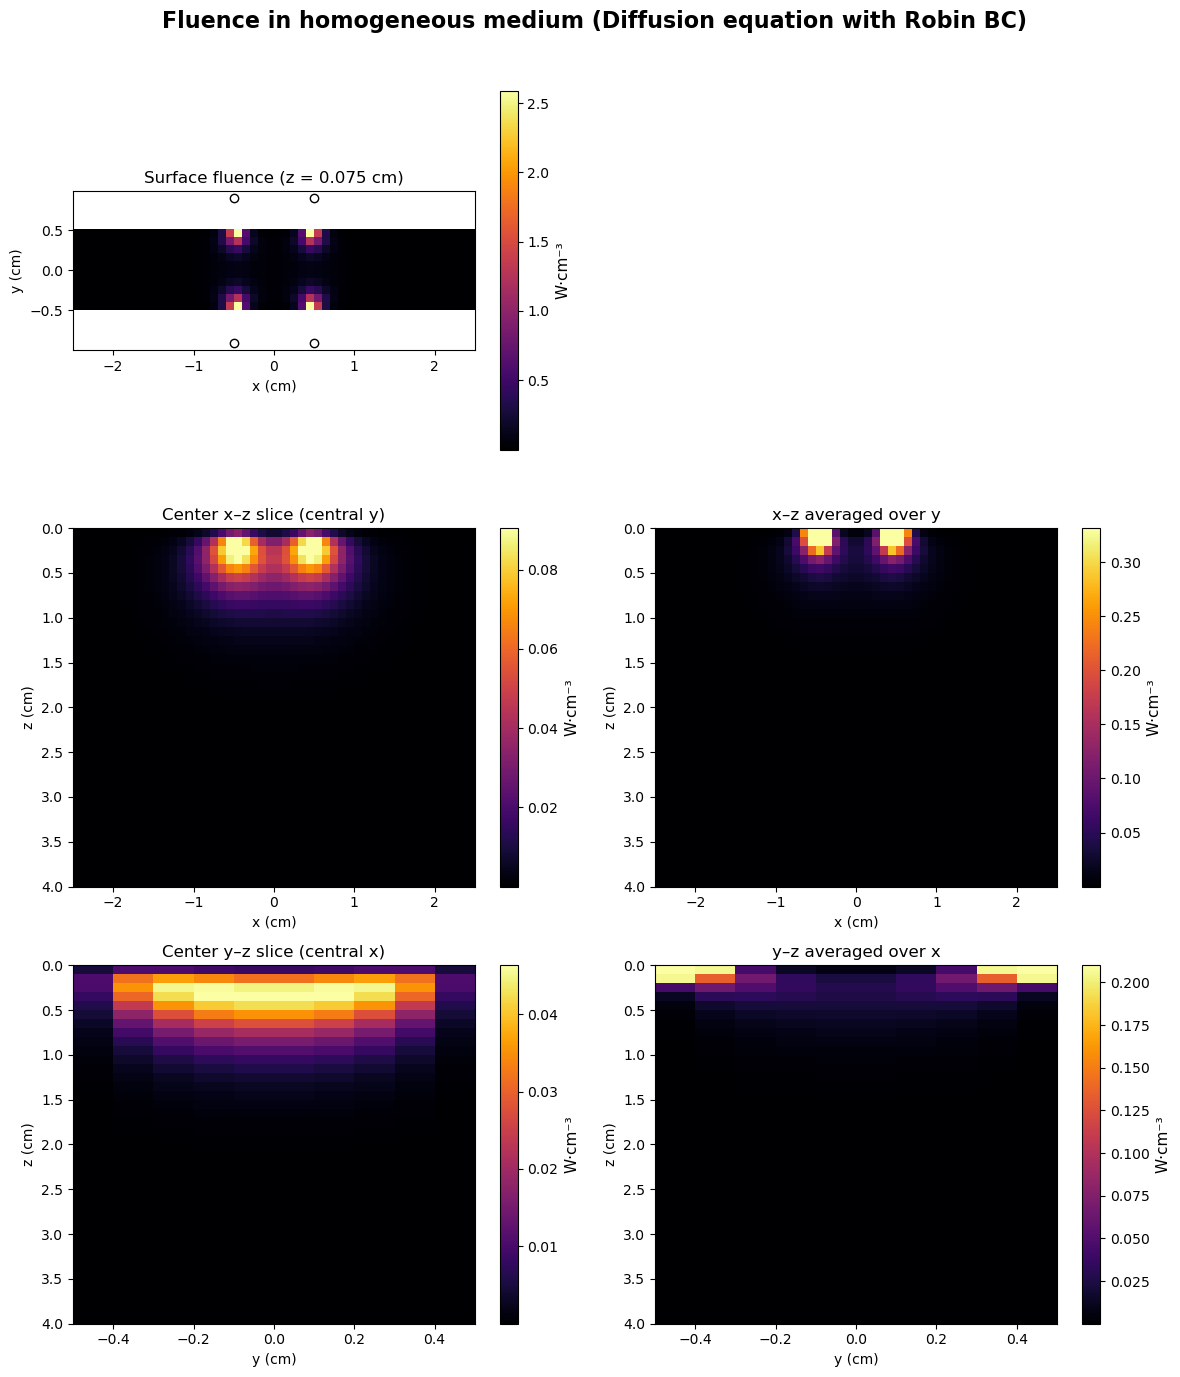

In [3]:
mu_a  = bkg_mua_pat['Background mua'][0]
mu_sp = bkg_mus_pat['Background mus'][0]
phi_homogeneous = compute_phi_homogeneous(mu_a=mu_a, mu_sp=mu_sp , dx=0.1, dy=0.1, dz=0.1, sigma_src = 0.03, verbose=True)

Building pyamg multigrid hierarchy...
Solving with pyamg.ml.solve(...)
Done. max(Phi) = 1.2555e+01 1/cm^3, mean(Phi) = 1.2516e-02 1/cm^3


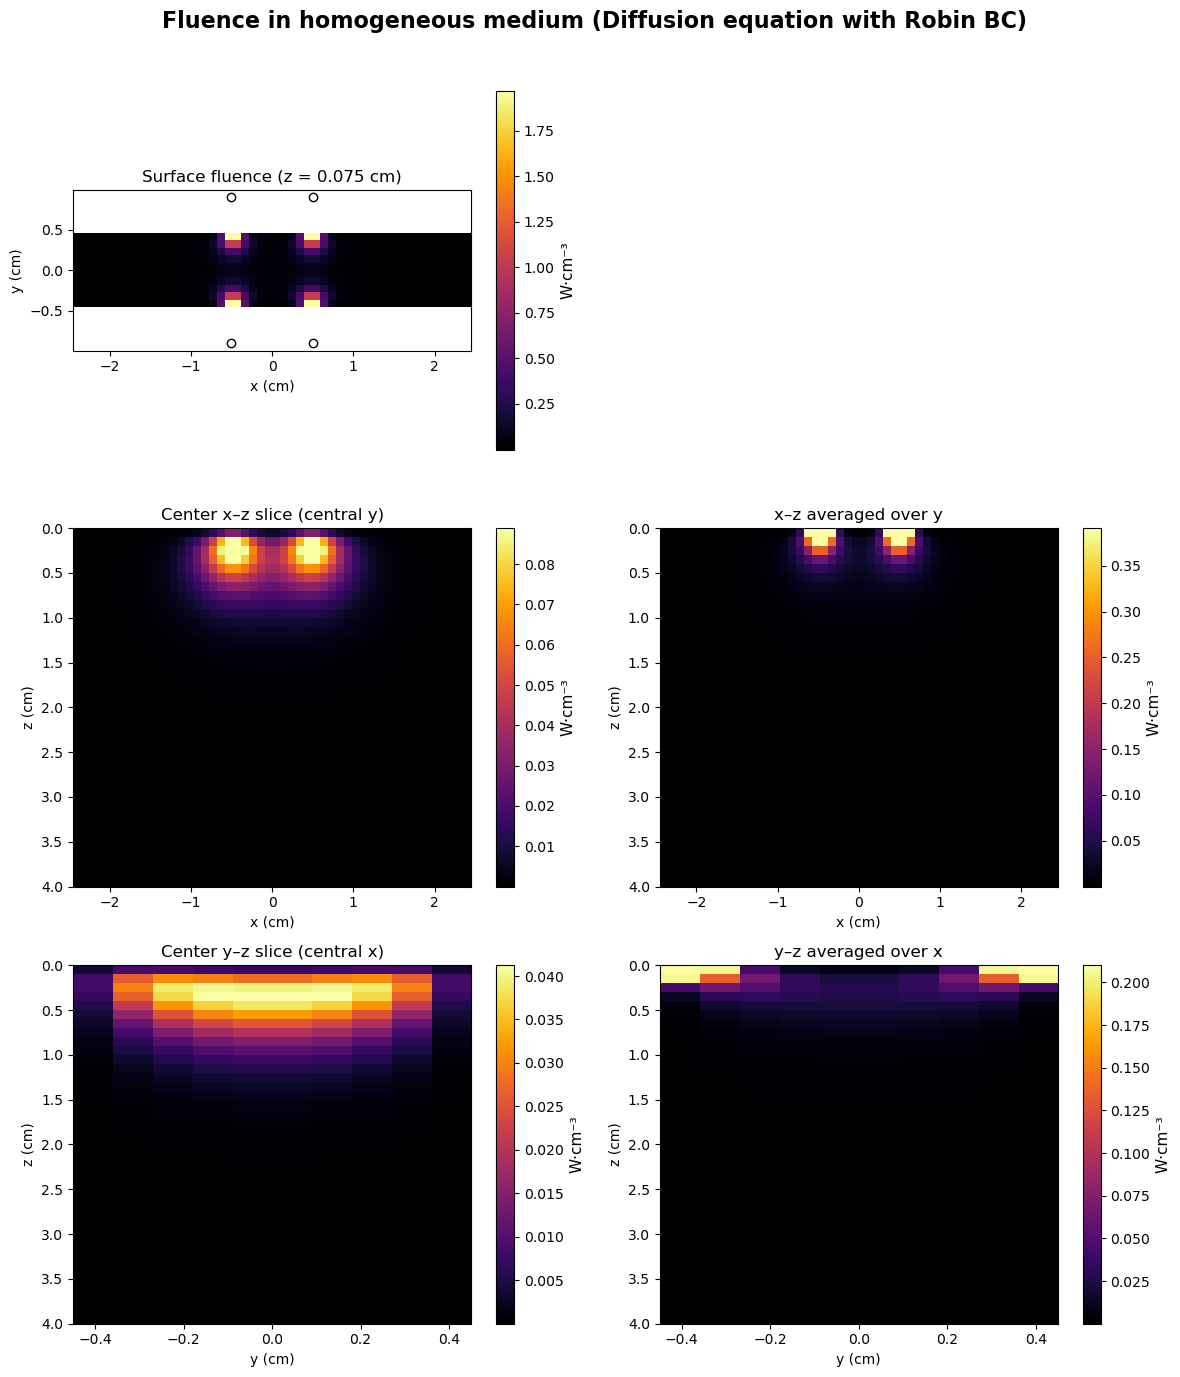

In [4]:
import numpy as np
Ny, Nx, Nz = phi_homogeneous["fluence"].shape
mu_a_map  = mu_a * np.ones((Nz, Ny, Nx))
mu_sp_map = mu_sp * np.ones((Nz, Ny, Nx))
phi_heterogeneous, info = compute_phi_heterogeneous(mu_a_cm=mu_a_map, mu_sp_cm=mu_sp_map, fiber_sigma_cm=0.03, verbose=True)